<a href="https://colab.research.google.com/github/ean0418/ean0418/blob/main/Jul31_2_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# data 폴더 안에 있는 births.txt파일을 load하기
birth = np.loadtxt('data/births.txt', delimiter=',', dtype=np.int64)

In [2]:
print(birth.shape)
print(type(birth))


(132, 3)
<class 'numpy.ndarray'>


In [4]:
birth.astype(int)

# 결과 : 연도, 남자아이 수, 여자아이 수로 구성


array([[   1880,   90993,  110491],
       [   1881,   91954,  100745],
       [   1882,  107850,  113688],
       [   1883,  112321,  104629],
       [   1884,  129022,  114445],
       [   1885,  133055,  107800],
       [   1886,  144535,  110784],
       [   1887,  145982,  101414],
       [   1888,  178627,  120853],
       [   1889,  178366,  110584],
       [   1890,  190377,  111025],
       [   1891,  185482,  101196],
       [   1892,  212346,  122037],
       [   1893,  212906,  112317],
       [   1894,  222922,  115772],
       [   1895,  233630,  117398],
       [   1896,  237920,  119570],
       [   1897,  234202,  112758],
       [   1898,  258770,  122693],
       [   1899,  233023,  106212],
       [   1900,  299828,  150499],
       [   1901,  239348,  106471],
       [   1902,  264077,  122659],
       [   1903,  261973,  119234],
       [   1904,  275371,  128125],
       [   1905,  291629,  132319],
       [   1906,  295303,  133159],
       [   1907,  318566,  1

In [5]:
import matplotlib.pyplot as plt

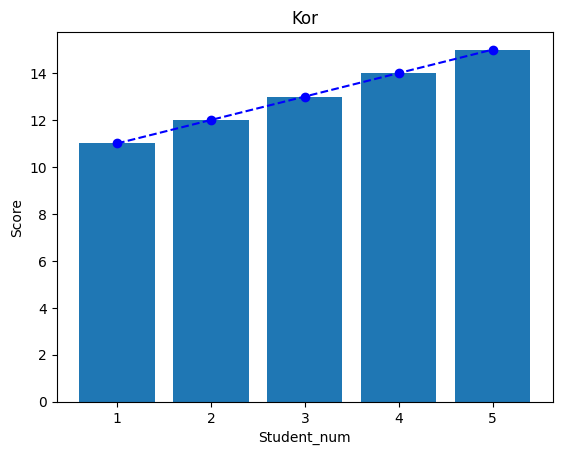

In [6]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([11, 12, 13, 14, 15])

plt.plot(a, b, 'bo--')
plt.bar(a,b)

plt.title('Kor')
plt.xlabel('Student_num')
plt.ylabel('Score')

plt.show()

In [16]:
# 1. 남자아이, 여자아이 출생 수 평균을 구해주세요 (정수로 출력)
boy = birth[:,1]
girl = birth[:,2]

print(np.mean(boy).astype(int))
print(np.mean(girl).astype(int))

1225776
1245399


In [186]:
# 2. 2000년부터의 데이터를 구해주세요 (2000 ~ 2011)
#   연도  남자    여자
#   2000  1234567 1234567
#   ...     ...     ...
year = birth[:, 0]
boy = birth[:,1]
girl = birth[:,2]

print(year[year >= 2000])
print(boy[year >= 2000])
print(girl[year >= 2000])

# tchr answer
print("연도", "남자", "여자", sep="\t")
print("=" * 30)
for y,b,g in birth[birth[year>=2000]]:
    print(y, b, g, sep="\t")


[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.]
[1814601. 1799049. 1795206. 1825359. 1834145. 1845379. 1898463. 1919408.
 1887234. 1832925. 1772738. 1753500.]
[1962406. 1941251. 1939815. 1973434. 1982794. 1994841. 2052377. 2072139.
 2036289. 1979303. 1913851. 1893230.]
연도	남자	여자


ValueError: too many values to unpack (expected 2)

In [136]:
# 3. 남자아이 출생이 가장 많은 연도와 남자아이 출생 수를 구해주세요
print(year[np.argmax(boy)])
print(np.max(boy))

# tchr answer
# argmax() : 가장 많은 값의 index 반환
birth [birth[:,1].argmax()]
y = birth [birth[:,1].argmax()][0]
b = birth [birth[:,1].argmax()][1]

print("연도", "남자아이", sep='\t')
print(y,b,sep="\t")


1957.0
2044160.0
연도	남자아이
1957.0	2044160.0


In [145]:
# 4. 여자아이 출생이 가장 많은 top5를 구해주세요 (연도, 여자아이 수)
print(year[np.argsort(girl)[-5:]])
print(np.sort(girl)[-5:])

# tchr answer
top5_girls = np.sort(birth[:,2])[-1:-6:-1]
print(top5_girls)

print("연도", "여자아이", sep='\t')
print("=" * 30)
for i in birth:
  for j in top5_girls:
    if (i[2] == j):
      print(i[0], j, sep="\t")

[1958. 1961. 1960. 1959. 1957.]
[2120712. 2122502. 2132717. 2133509. 2155866.]
[2155866. 2133509. 2132717. 2122502. 2120712.]
연도	여자아이
1957.0	2155866.0
1958.0	2120712.0
1959.0	2133509.0
1960.0	2132717.0
1961.0	2122502.0


In [150]:
# 5. 여자아이 출생률(%)을 구하고, 각 연도별로 여자아이 출생수가 차지하는 비율을
# 데이터로 보여주세요 (소수점 둘째자리까지)
# year  boy  girl  q 이런 형식으로 출력
# 1990  1234  1234  0.55
girlRate = girl / (boy + girl) * 100
print(np.round(girlRate,2))
birth2 = np.column_stack((year, boy, girl, girlRate.astype(int)))
print(birth2)

# tchr answer
girls_ratio = (birth[:,2] / (birth[:,1] + birth[:,2]) * 100).round(2)
girls_ratio

print("연도", "남아", "여아","여아 출생률", sep='\t')
print("=" * 30)
for y, b, g, gr in zip(birth[:,0], birth[:,1], birth[:,2], girls_ratio):
    print(y, b, g, gr, sep="\t")

[54.84 52.28 51.32 48.23 47.01 44.76 43.39 40.99 40.35 38.27 36.84 35.3
 36.5  34.54 34.18 33.44 33.45 32.5  32.16 31.31 33.42 30.79 31.72 31.28
 31.75 31.21 31.08 31.55 31.59 32.08 32.88 35.07 43.51 45.08 46.23 46.31
 46.01 46.12 46.68 46.45 47.04 47.18 47.54 47.61 47.56 47.83 48.37 48.59
 48.99 49.06 49.36 49.4  49.45 49.59 49.72 49.82 49.92 50.06 50.13 50.23
 50.34 50.41 50.55 50.56 50.66 50.73 50.82 50.79 50.82 50.9  51.11 51.1
 51.18 51.16 51.2  51.29 51.29 51.33 51.33 51.33 51.33 51.27 51.27 51.32
 51.27 51.33 51.32 51.38 51.46 51.48 51.54 51.54 51.61 51.68 51.74 51.73
 51.73 51.74 51.74 51.76 51.8  51.78 51.73 51.76 51.73 51.78 51.77 51.77
 51.8  52.04 51.96 51.86 51.99 52.02 51.97 51.98 51.94 51.99 51.96 51.98
 51.96 51.9  51.94 51.95 51.95 51.95 51.95 51.91 51.9  51.92 51.91 51.92]
[[1.880000e+03 9.099300e+04 1.104910e+05 5.400000e+01]
 [1.881000e+03 9.195400e+04 1.007450e+05 5.200000e+01]
 [1.882000e+03 1.078500e+05 1.136880e+05 5.100000e+01]
 [1.883000e+03 1.123210e+05 1.046

In [157]:
# 6. 2000년 이후 데이터에 대해 출생량을 구하고,
# 남자아이 수가 1800000 이상이면 '많음', 아니면 '적음' 이라는 내용을 출력
a = boy[year >= 2000]
b = girl[year >= 2000]
c = a + b
print(c)

for i in range(len(a)):
    if a[i] >= 1800000:
        print(a[i],'많음')
    else:
        print(a[i],'적음')

#tchr answer
after_2000 = birth[birth[:,0] >= 2000]
print(after_2000)

boys = after_2000[:,1]
print(boys)

amount = np.where(boys >= 1800000, '많음', '적음')
print(amount)

for y, b, amt in zip(after_2000[:,0], boys, amount):
    print(y, b, amt)

[3777007. 3740300. 3735021. 3798793. 3816939. 3840220. 3950840. 3991547.
 3923523. 3812228. 3686589. 3646730.]
1814601.0 많음
1799049.0 적음
1795206.0 적음
1825359.0 많음
1834145.0 많음
1845379.0 많음
1898463.0 많음
1919408.0 많음
1887234.0 많음
1832925.0 많음
1772738.0 적음
1753500.0 적음
[[2.00000000e+03 1.81460100e+06 1.96240600e+06 5.19566419e+01
  5.19566419e+01 5.19566419e+01 5.19566419e+01]
 [2.00100000e+03 1.79904900e+06 1.94125100e+06 5.19009438e+01
  5.19009438e+01 5.19009438e+01 5.19009438e+01]
 [2.00200000e+03 1.79520600e+06 1.93981500e+06 5.19358526e+01
  5.19358526e+01 5.19358526e+01 5.19358526e+01]
 [2.00300000e+03 1.82535900e+06 1.97343400e+06 5.19489743e+01
  5.19489743e+01 5.19489743e+01 5.19489743e+01]
 [2.00400000e+03 1.83414500e+06 1.98279400e+06 5.19472279e+01
  5.19472279e+01 5.19472279e+01 5.19472279e+01]
 [2.00500000e+03 1.84537900e+06 1.99484100e+06 5.19460083e+01
  5.19460083e+01 5.19460083e+01 5.19460083e+01]
 [2.00600000e+03 1.89846300e+06 2.05237700e+06 5.19478643e+01
  5.1947864

In [165]:
# 7. 1800년대, 1900년대, 2000년대 각 남자아이, 여자아이 출생수의 평균
a20 = boy[year >= 2000]
b20 = girl[year >= 2000]
a19 = boy[(year >= 1900) & (year < 2000)]
b19 = girl[(year >= 1900) & (year < 2000)]
a18 = boy[(year >= 1800) & (year < 1900)]
b18 = girl[(year >= 1800) & (year < 1900)]
print(np.around(np.mean(a20),2), np.around(np.mean(b20),2))
print(np.mean(a19), np.mean(b19))
print(np.mean(a18), np.mean(b18))

#tchr answer
print("1800년대")
print("남아 평균", "여야 평균")
k_1800s = birth[(birth[:,0] >= 1800) & (birth[:,0] < 1900)][:, 1:]
# print(k_1800s)
print(k_1800s.mean(axis=0)[0], k_1800s.mean(axis=0)[1])
print("1900년대")
print("남아 평균", "여야 평균")
k_1900s = birth[(birth[:,0] >= 1900) & (birth[:,0] < 2000)][:, 1:]
# print(k_1900s)
print(k_1900s.mean(axis=0)[0], k_1900s.mean(axis=0)[1])
print("20000년대")
print("남아 평균", "여야 평균")
k_2000s = birth[(birth[:,0] >= 2000)][:, 1:]
# print(k_1800s)
print(k_1800s.mean(axis=0)[0].round(2), k_1800s.mean(axis=0)[1])

1831500.58 1978477.5
1362901.51 1384145.55
176714.15 111820.55
1800년대
남아 평균 여야 평균
176714.15 111820.55
1900년대
남아 평균 여야 평균
1362901.51 1384145.55
20000년대
남아 평균 여야 평균
176714.15 111820.55


In [172]:
# 8. 여자아이 출생수 25%~75% 사이의 값을 구해주세요(연도, 여자아이 출생수)
np.quantile(girl, [0.25,0.75])

# tchr answer
g_q25 = np.quantile(birth[:,2], 0.25)
g_q75 = np.quantile(birth[:,2], 0.75)
print(g_q25, g_q75)
print(birth[(birth[:,2] >= g_q25) & (birth[:,2] >= g_q75)][:,[0,2]].astype(int) )

491904.0 1904686.5
[[   1952 1944277]
 [   1953 1969777]
 [   1954 2037374]
 [   1955 2057918]
 [   1956 2113694]
 [   1957 2155866]
 [   1958 2120712]
 [   1959 2133509]
 [   1960 2132717]
 [   1961 2122502]
 [   1962 2068945]
 [   1963 2031755]
 [   1964 1993270]
 [   1988 1912602]
 [   1989 1999999]
 [   1990 2052543]
 [   1991 2019463]
 [   1992 1996388]
 [   1993 1960397]
 [   1994 1931157]
 [   1998 1910250]
 [   1999 1918809]
 [   2000 1962406]
 [   2001 1941251]
 [   2002 1939815]
 [   2003 1973434]
 [   2004 1982794]
 [   2005 1994841]
 [   2006 2052377]
 [   2007 2072139]
 [   2008 2036289]
 [   2009 1979303]
 [   2010 1913851]]


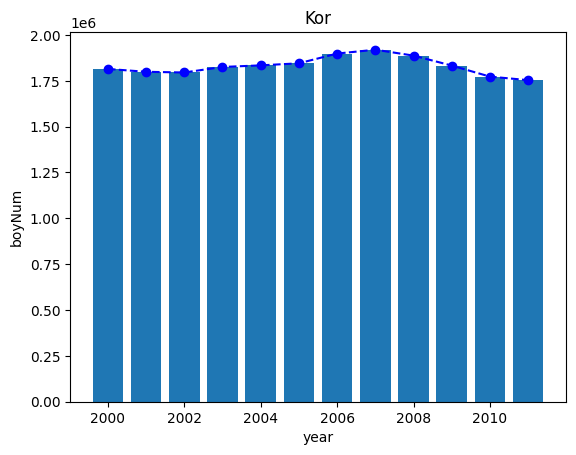

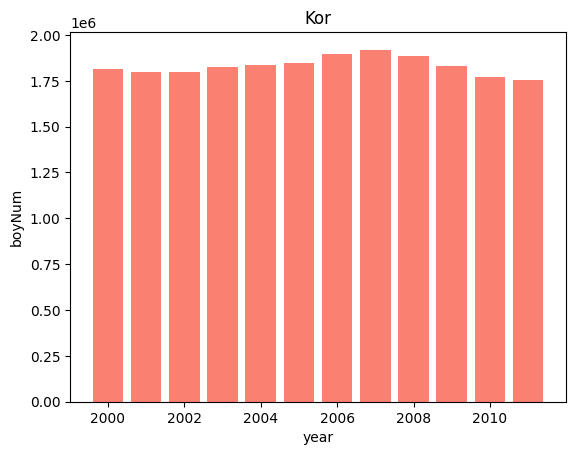

In [173]:
# 9. 2000년대 남자아이 데이터를 bar차트

a = year[year >= 2000]
b = boy[year >= 2000]

plt.plot(a, b, 'bo--')
plt.bar(a,b)

plt.title('Kor')
plt.xlabel('year')
plt.ylabel('boyNum')

plt.show()

#tchr answer
b_2000s = birth[birth[:,0] >= 2000][:,0:2]
plt.bar(b_2000s[:,0], b_2000s[:,1],color="salmon")
plt.title('Kor')
plt.xlabel('year')
plt.ylabel('boyNum')
plt.show()